In [2]:
__author__ = 'michaelrosenthal'

# import drag_functions_turb as fn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter
from time_TvsR import *
from matplotlib.colors import LogNorm
import os
import time

#import colormaps as cmaps
#plt.register_cmap(name='viridis', cmap=cmaps.viridis)
#plt.register_cmap(name='plasma', cmap=cmaps.plasma)
#plt.register_cmap(name='magma', cmap=cmaps.magma)

%matplotlib inline
#Flags
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = True
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18


Exists
0 1e-100 -4.0 4.0
Exists
1 0.001 -4.0 4.0
Exists
2 0.01 -4.0 4.0
Exists
3 0.1 -4.0 4.0


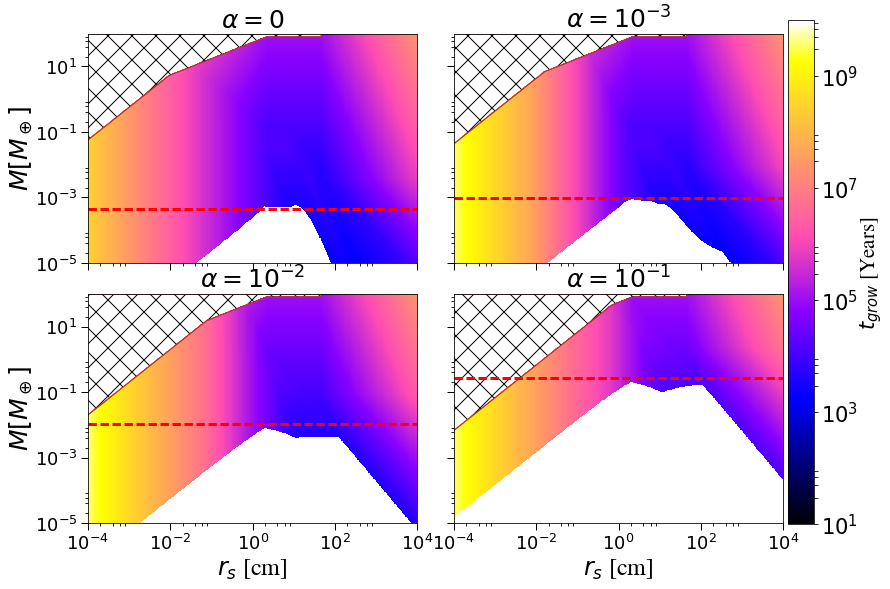

In [7]:
save_fig = 0
semi_maj = 30.
alph_arr = [1e-100,1e-3,1e-2,1e-1]

T = 200*semi_maj**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(semi_maj*fn.au)**3.)
vk = semi_maj*fn.au*om
eta = c_s**2./2./vk**2.

cmap = 'gnuplot2'

file_names = ['rev6_a_30.0_M_*_1.0_alph_0.00000_long_grid_2', 'rev6_a_30.0_M_*_1.0_alph_0.00100_long_grid_2',
              'rev6_a_30.0_M_*_1.0_alph_0.01000_long_grid_2', 'rev6_a_30.0_M_*_1.0_alph_0.10000_long_grid_2']

fig = plt.figure(1,figsize=(12,9))

for j,fname in enumerate(file_names):

    fname_param = fname + '_params.txt'
    f = open('txt_files/' + fname_param,'r')
    param_arr = f.readlines()
    param_arr = [float(i) for i in param_arr]
    f.close()
    m_range_low,m_range_hi,r_range_low,r_range_hi,m_star,semi_major,alph = param_arr

    m_arr = np.logspace(m_range_low,m_range_hi,num=1000)
    r_arr = np.logspace(r_range_low,r_range_hi,num=300)
    
    st_arr = [st_rad(a_au=semi_maj,rad=r) for r in r_arr]

    ax = plt.subplot(2,2,j+1)
    
    if os.path.exists('txt_files/' + fname + '.txt'):
        time_arr = np.loadtxt('txt_files/' + fname + '.txt')
        print("Exists")
    else:
        time_arr = np.loadtxt('txt_files/' + fname)
        print("Does Not Exist")
        
    print(j,alph, r_range_low, r_range_hi)
    
    if j == 0:
        plt.title(r'$\alpha = 0$',fontsize=25)
    else:
        plt.title(r'$\alpha = 10^{%.3g}$' %np.log10(alph),fontsize=25)
        
    X, Y = np.meshgrid(r_arr,m_arr)
#     X, Y = np.meshgrid(st_arr,m_arr)
    im = plt.pcolormesh(X,Y,time_arr, cmap=cmap,norm=LogNorm(),vmin=1e1,vmax=1e10)

    plt.xscale('log')
    plt.yscale('log')
    
    im.set_edgecolor('face')
    ax = plt.gca()
#     ax.tick_params(labelsize=23) 
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
    
#     im_2 = plt.imread("../red_lines_3.png")
#     implot = plt.imshow(im_2,extent=[10**r_range_low/1e2,10**r_range_hi*1e2,10**m_range_low/1e2,10**m_range_hi*1e2])
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))
#     plt.axis([st_arr[0],st_arr[-1],m_arr[0],m_arr[-1]])
    
#     rad_min_1 = 3249.85*(semi_maj)**(23./14.)*r_arr/(1.45026e6*(semi_maj)**(1./7.)+7.17403e9*alph*(semi_maj)**(-3./7))**(1./2.)
    rad_min_1 = 3.07707e-4*np.sqrt(1.45026e6*(semi_maj)**(1./7.)+7.17403e9*alph_arr[j]*semi_maj**(-3./7))*m_arr*(semi_maj)**(-23./14.)
    rad_min_2 = 3.40532*(semi_maj)**(-19./7.)*(m_arr)**2.
    
    v_gas = np.sqrt(alph_arr[j]*c_s**2. + eta**2.*vk**2.)
    rad_min_3 = 7.95148e-8*(semi_maj)**(-5./2.)*m_arr**(-1./3.)*v_gas
    
    rad_min = np.maximum(rad_min_1,rad_min_2)
    rad_min = np.maximum(rad_min,rad_min_3)
    
    m_crit = 4.28453*(semi_maj)**(6./7.)
    m_crit_ind = np.where(m_arr<m_crit)[0][-1]
    r_s_crit = st_solver(a_au=semi_maj,st=4.*(3)**(1./2.))
    rad_min[m_crit_ind+2::] = r_s_crit

    plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='/')
    plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='\\')
    
    m_crit = 7.87221e-16*(semi_maj)**(3./2.)*v_gas**3.
    plt.axhline(y=m_crit,linestyle='dashed',linewidth=3,color='r')
    
# cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
# cax = fig.add_axes([0.895, 0.123, 0.03, 0.8])
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
# plt.subplots_adjust(left=0.070,right=0.865,hspace=0.08,wspace=0.07)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)

#if save_fig:
#    fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/paper1_submit/revised_figures/test.png',dpi=150)
    # fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/paper1_submit/revised_figures/tst.png',dpi=150)
#    print('yes')
    


In [68]:
fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/paper1_submit/revised_figures/test.png',dpi=150)

Exists
0 1e-100 -4.0 4.0
Exists
1 0.001 -4.0 4.0
Exists
2 0.01 -4.0 4.0
Exists
3 0.1 -4.0 4.0
yes


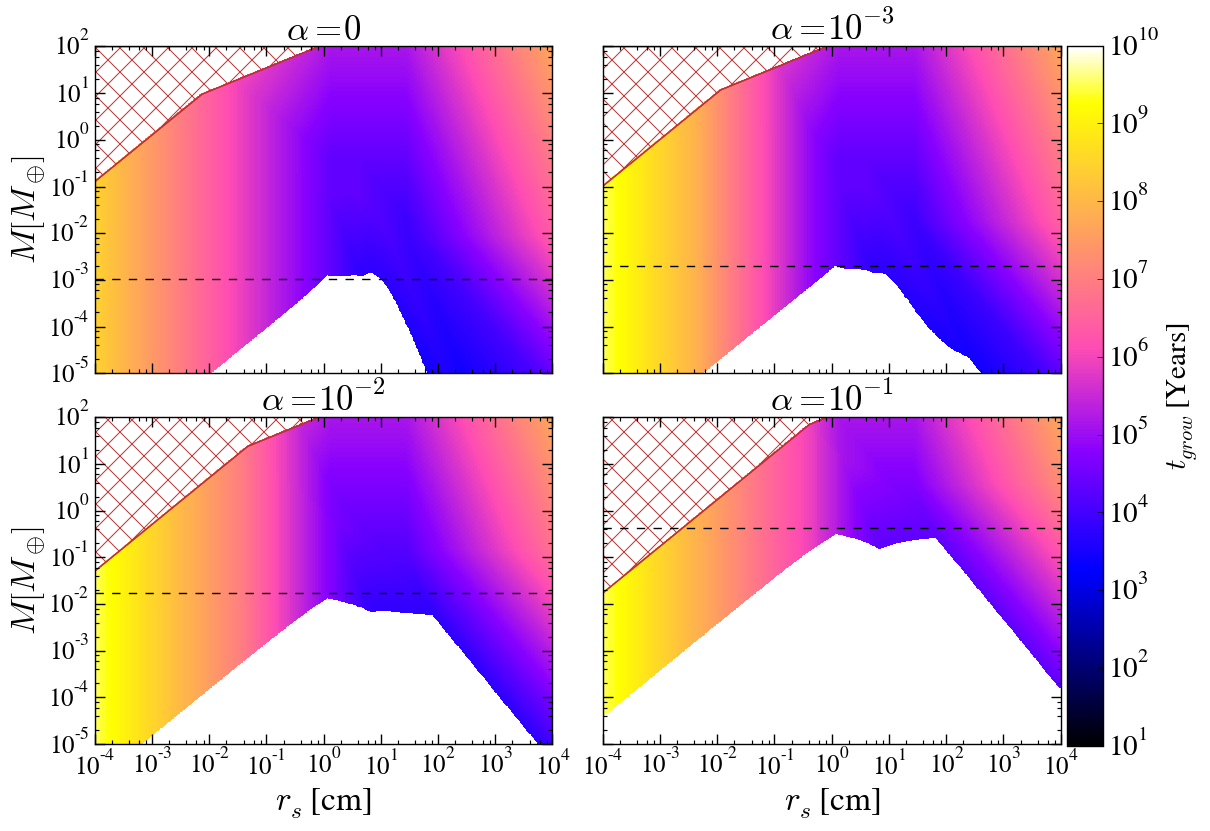

In [3]:
save_fig = 1
cmap = 'gnuplot2'

semi_maj = 50.
alph_arr = [1e-100,1e-3,1e-2,1e-1]

T = 200*semi_maj**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(semi_maj*fn.au)**3.)
vk = semi_maj*fn.au*om
eta = c_s**2./2./vk**2.

file_names = ['rev5_a_50.0_M_*_1.0_alph_0.00000_long_grid_2','rev5_a_50.0_M_*_1.0_alph_0.00100_long_grid_2','rev5_a_50.0_M_*_1.0_alph_0.01000_long_grid_2',\
              'rev5_a_50.0_M_*_1.0_alph_0.10000_long_grid_2']

fig = plt.figure(1,figsize=(12,9))

for j,fname in enumerate(file_names):

    fname_param = fname + '_params.txt'
    f = open('../txt_files/' + fname_param,'r')
    param_arr = f.readlines()
    param_arr = [float(i) for i in param_arr]
    f.close()
    m_range_low,m_range_hi,r_range_low,r_range_hi,m_star,semi_major,alph = param_arr

    m_arr = np.logspace(m_range_low,m_range_hi,num=1000)
    r_arr = np.logspace(r_range_low,r_range_hi,num=300)

    ax = plt.subplot(2,2,j+1)
    
    if os.path.exists('../txt_files/' + fname + '.txt'):
        time_arr = np.loadtxt('../txt_files/' + fname + '.txt')
        print "Exists"
    else:
        time_arr = np.loadtxt('../txt_files/' + fname)
        print "Does Not Exist"
        
    print j,alph, r_range_low, r_range_hi
    
    if j == 0:
        plt.title(r'$\alpha = 0$',fontsize=25)
    else:
        plt.title(r'$\alpha = 10^{%.3g}$' %np.log10(alph),fontsize=25)
        
    X, Y = np.meshgrid(r_arr,m_arr)
    im = plt.pcolormesh(X,Y,time_arr, cmap=cmap,norm=LogNorm(),vmin=1e1,vmax=1e10)

    plt.xscale('log')
    plt.yscale('log')
    
    im.set_edgecolor('face')
    ax = plt.gca()
#     ax.tick_params(labelsize=23) 
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
    
#     im_2 = plt.imread("../red_lines_3.png")
#     implot = plt.imshow(im_2,extent=[10**r_range_low/1e2,10**r_range_hi*1e2,10**m_range_low/1e2,10**m_range_hi*1e2])
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))
    
    rad_min_1 = 3.07707e-4*np.sqrt(1.45026e6*(semi_maj)**(1./7.)+7.17403e9*alph_arr[j]*semi_maj**(-3./7))*m_arr*(semi_maj)**(-23./14.)
    rad_min_2 = 3.40532*(semi_maj)**(-19./7.)*(m_arr)**2.
    
    v_gas = np.sqrt(alph_arr[j]*c_s**2. + eta**2.*vk**2.)
    rad_min_3 = 7.95148e-8*(semi_maj)**(-5./2.)*m_arr**(-1./3.)*v_gas
    
    rad_min = np.maximum(rad_min_1,rad_min_2)
    rad_min = np.maximum(rad_min,rad_min_3)
    
    m_crit = 4.28453*(semi_maj)**(6./7.)
    m_crit_ind = np.where(m_arr<m_crit)[0][-1]
    r_s_crit = st_solver(a_au=semi_maj,st=4.*(3)**(1./2.))
    rad_min[m_crit_ind+1::] = r_s_crit
    
    m_crit = 7.87221e-16*(semi_maj)**(3./2.)*v_gas**3.
    plt.axhline(y=m_crit,linestyle='dashed',color='k')

    plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='/')
    plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='\\')
    
# cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
# cax = fig.add_axes([0.89, 0.123, 0.03, 0.8])
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)

if save_fig:
    fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/paper1_submit/revised_figures/test.png',dpi=150)
    # fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/paper1_submit/revised_figures/tst.png',dpi=150)
    print 'yes'
    
# plt.subplots_adjust(left=0.070,right=0.865,hspace=0.13,wspace=0.09)

In [6]:
semi_maj = 50.
alph = 1e-1

T = 200*semi_maj**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(semi_maj*fn.au)**3.)
vk = semi_maj*fn.au*om
eta = c_s**2./2./vk**2.
v_gas = np.sqrt(alph*c_s**2. + eta**2.*vk**2.)

7.87221e-16*(semi_maj)**(3./2.)*v_gas**3.

0.43107832729083706

# Make Single Panel Heatmaps

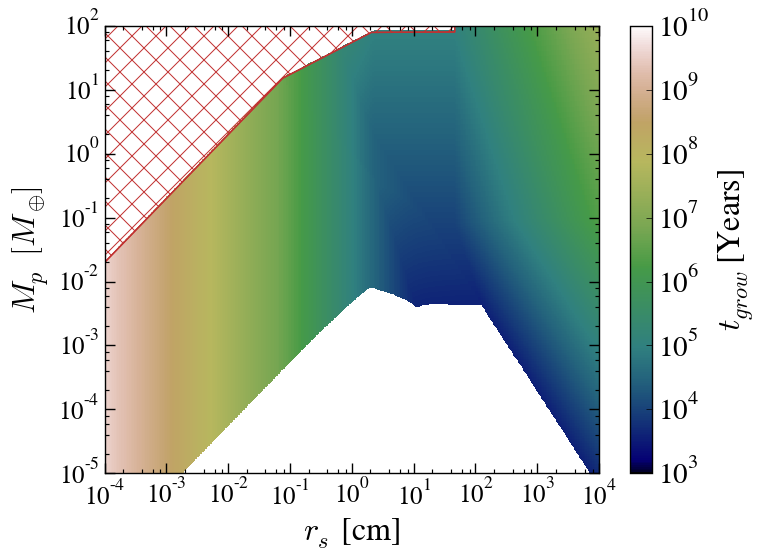

In [11]:
save_fig = 1
cmap = 'gist_earth'

semi_maj = 30.
alph = 1e-2

T = 200*semi_maj**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(semi_maj*fn.au)**3.)
vk = semi_maj*fn.au*om
eta = c_s**2./2./vk**2.

filename = 'rev6_a_30.0_M_*_1.0_alph_0.01000_long_grid_2'

fig = plt.figure(1,figsize=(8,6))

fname_param = filename + '_params.txt'
f = open('../txt_files/' + fname_param,'r')
param_arr = f.readlines()
param_arr = [float(i) for i in param_arr]
f.close()
time_arr = np.loadtxt('../txt_files/' + filename + '.txt')
m_range_low,m_range_hi,r_range_low,r_range_hi,m_star,semi_major,alph = param_arr

m_arr = np.logspace(m_range_low,m_range_hi,num=1000)
r_arr = np.logspace(r_range_low,r_range_hi,num=300)


X, Y = np.meshgrid(r_arr,m_arr)
im = plt.pcolormesh(X,Y,time_arr, cmap=cmap,norm=LogNorm(),vmin=1e3,vmax=1e10)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$r_s$ [cm]',fontsize=23)
plt.ylabel(r'$M_p \, [M_\oplus]$',fontsize=23)

im.set_edgecolor('face')
ax = plt.gca()
#     ax.tick_params(labelsize=23) 
ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)

plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))
    
rad_min_1 = 3.07707e-4*np.sqrt(1.45026e6*(semi_maj)**(1./7.)+7.17403e9*alph*semi_maj**(-3./7))*m_arr*(semi_maj)**(-23./14.)
rad_min_2 = 3.40532*(semi_maj)**(-19./7.)*(m_arr)**2.

v_gas = np.sqrt(alph*c_s**2. + eta**2.*vk**2.)
rad_min_3 = 7.95148e-8*(semi_maj)**(-5./2.)*m_arr**(-1./3.)*v_gas

rad_min = np.maximum(rad_min_1,rad_min_2)
rad_min = np.maximum(rad_min,rad_min_3)

m_crit = 4.28453*(semi_maj)**(6./7.)
m_crit_ind = np.where(m_arr<m_crit)[0][-1]
r_s_crit = st_solver(a_au=semi_maj,st=4.*(3)**(1./2.))
rad_min[m_crit_ind+1::] = r_s_crit

# m_crit = 7.87221e-16*(semi_maj)**(3./2.)*v_gas**3.
# plt.axhline(y=m_crit,linestyle='dashed',color='k')

plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='/')
plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='\\')

cb = fig.colorbar(im,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=23)
cb.ax.tick_params(labelsize=21)

plt.tight_layout()

In [12]:
fig.savefig('../../Talks/DDA_Meeting/heatmap_30AU_alpha_1e-2.png',dpi=150)

# Check Heatmaps

Exists
0 1e-100 -4.0 4.0
Exists
1 0.001 -4.0 4.0
Exists
2 0.01 -4.0 4.0
Exists
3 0.1 -4.0 4.0


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


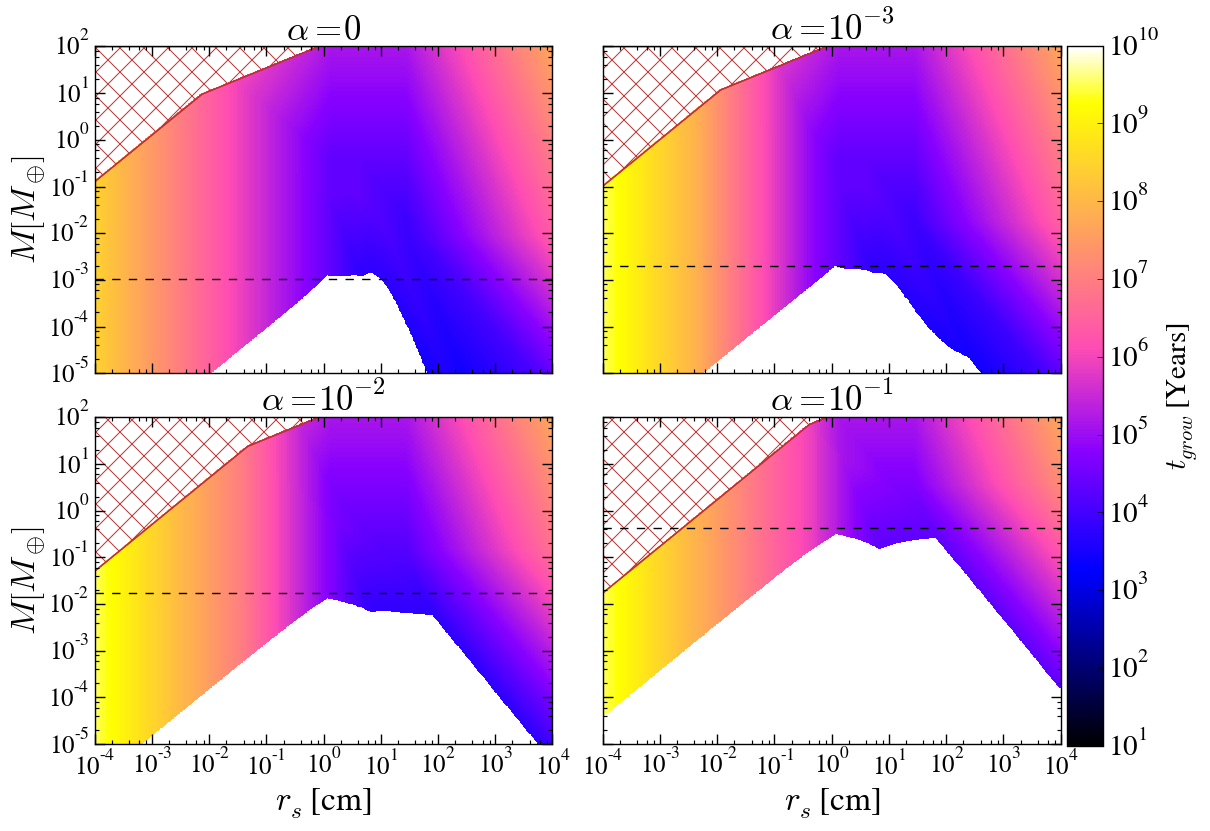

In [3]:
save_fig = 0
cmap = 'gnuplot2'

semi_maj = 50.
alph_arr = [1e-100,1e-3,1e-2,1e-1]

T = 200*semi_maj**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(semi_maj*fn.au)**3.)
vk = semi_maj*fn.au*om
eta = c_s**2./2./vk**2.

file_names = ['rev6_a_50.0_M_*_1.0_alph_0.00000_long_grid_2','rev6_a_50.0_M_*_1.0_alph_0.00100_long_grid_2','rev6_a_50.0_M_*_1.0_alph_0.01000_long_grid_2',\
              'rev6_a_50.0_M_*_1.0_alph_0.10000_long_grid_2']

fig = plt.figure(1,figsize=(12,9))

for j,fname in enumerate(file_names):

    fname_param = fname + '_params.txt'
    f = open('../txt_files/' + fname_param,'r')
    param_arr = f.readlines()
    param_arr = [float(i) for i in param_arr]
    f.close()
    m_range_low,m_range_hi,r_range_low,r_range_hi,m_star,semi_major,alph = param_arr

    m_arr = np.logspace(m_range_low,m_range_hi,num=1000)
    r_arr = np.logspace(r_range_low,r_range_hi,num=300)

    ax = plt.subplot(2,2,j+1)
    
    if os.path.exists('../txt_files/' + fname + '.txt'):
        time_arr = np.loadtxt('../txt_files/' + fname + '.txt')
        print "Exists"
    else:
        time_arr = np.loadtxt('../txt_files/' + fname)
        print "Does Not Exist"
        
    print j,alph, r_range_low, r_range_hi
    
    if j == 0:
        plt.title(r'$\alpha = 0$',fontsize=25)
    else:
        plt.title(r'$\alpha = 10^{%.3g}$' %np.log10(alph),fontsize=25)
        
    X, Y = np.meshgrid(r_arr,m_arr)
    im = plt.pcolormesh(X,Y,time_arr, cmap=cmap,norm=LogNorm(),vmin=1e1,vmax=1e10)

    plt.xscale('log')
    plt.yscale('log')
    
    im.set_edgecolor('face')
    ax = plt.gca()
#     ax.tick_params(labelsize=23) 
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
    
#     im_2 = plt.imread("../red_lines_3.png")
#     implot = plt.imshow(im_2,extent=[10**r_range_low/1e2,10**r_range_hi*1e2,10**m_range_low/1e2,10**m_range_hi*1e2])
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))
    
    rad_min_1 = 3.07707e-4*np.sqrt(1.45026e6*(semi_maj)**(1./7.)+7.17403e9*alph_arr[j]*semi_maj**(-3./7))*m_arr*(semi_maj)**(-23./14.)
    rad_min_2 = 3.40532*(semi_maj)**(-19./7.)*(m_arr)**2.
    
    v_gas = np.sqrt(alph_arr[j]*c_s**2. + eta**2.*vk**2.)
    rad_min_3 = 7.95148e-8*(semi_maj)**(-5./2.)*m_arr**(-1./3.)*v_gas
    
    rad_min = np.maximum(rad_min_1,rad_min_2)
    rad_min = np.maximum(rad_min,rad_min_3)
    
    m_crit = 4.28453*(semi_maj)**(6./7.)
    m_crit_ind = np.where(m_arr<m_crit)[0][-1]
    r_s_crit = st_solver(a_au=semi_maj,st=4.*(3)**(1./2.))
    rad_min[m_crit_ind+1::] = r_s_crit
    
    m_crit = 7.87221e-16*(semi_maj)**(3./2.)*v_gas**3.
    plt.axhline(y=m_crit,linestyle='dashed',color='k')

    plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='/')
    plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='\\')
    
# cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
# cax = fig.add_axes([0.89, 0.123, 0.03, 0.8])
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)

if save_fig:
    fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/paper1_submit/revised_figures/test.png',dpi=150)
    # fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/paper1_submit/revised_figures/tst.png',dpi=150)
    print 'yes'
    
# plt.subplots_adjust(left=0.070,right=0.865,hspace=0.13,wspace=0.09)